In [7]:
library(ggplot2)
library(Rmisc)
set.seed(139)

m <- 650
lambda <- 1.32
theoric_confidence_interval <- 0.93
dimensions <- seq(100, 5000, 100)

calculate_mean_widths <- function(n) {
  widths <- c()
  for (i in 1:m) {
    exp <- rexp(n, rate=lambda)
    confidence_interval <- CI(exp, ci=theoric_confidence_interval)
    widths <- c(widths, c(abs(confidence_interval[["upper"]] - confidence_interval[["lower"]])))
  }
  return (mean(widths))
}

mean_widths <- c()
for (n in dimensions) {
  mean_widths <- c(mean_widths, calculate_mean_widths(n))
}

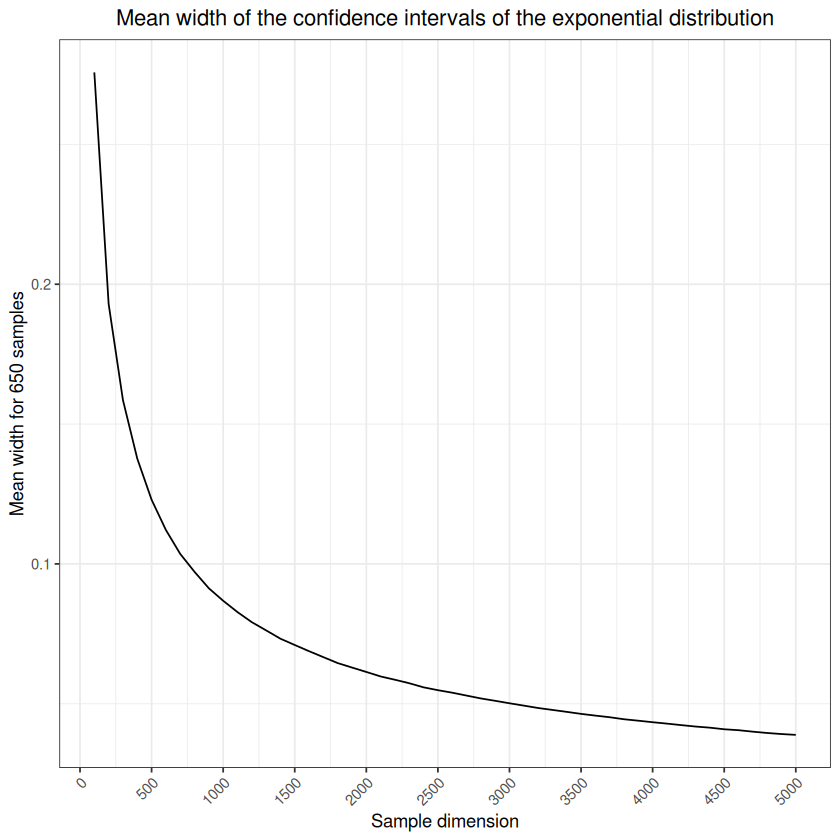

In [17]:
ggplot(data.frame(dimensions, mean_widths), aes(x=dimensions, y=mean_widths)) +
  geom_line() +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5)) +
  xlab("Sample dimension") + ylab("Mean width for 650 samples") +
  ggtitle("Mean width of the confidence intervals of the exponential distribution") +
  scale_x_continuous(breaks = round(seq(0, 5000, 500)))